In [2]:
import pandas as pd, numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import roc_curve, auc,roc_auc_score


Initial shape: (16860, 57)
X                   0.000000
Y                   0.000000
INDEX_              0.000000
ACCNUM              0.000000
YEAR                0.000000
DATE                0.000000
TIME                0.000000
HOUR                0.000000
STREET1             0.000000
STREET2             8.956109
OFFSET             83.712930
ROAD_CLASS          2.947805
DISTRICT            0.836299
WARDNUM             1.162515
DIVISION            1.162515
LATITUDE            0.000000
LONGITUDE           0.000000
LOCCOORD            0.622776
ACCLOC             32.325030
TRAFFCTL            0.172005
VISIBILITY          0.106762
LIGHT               0.000000
RDSFCOND            0.136418
ACCLASS             0.000000
IMPACTYPE           0.023725
INVTYPE             0.071174
INVAGE              0.000000
INJURY              9.561091
FATAL_NO           95.771056
INITDIR            29.027284
VEHTYPE            16.684460
MANOEUVER          42.900356
DRIVACT            49.810202
DRIVCOND        

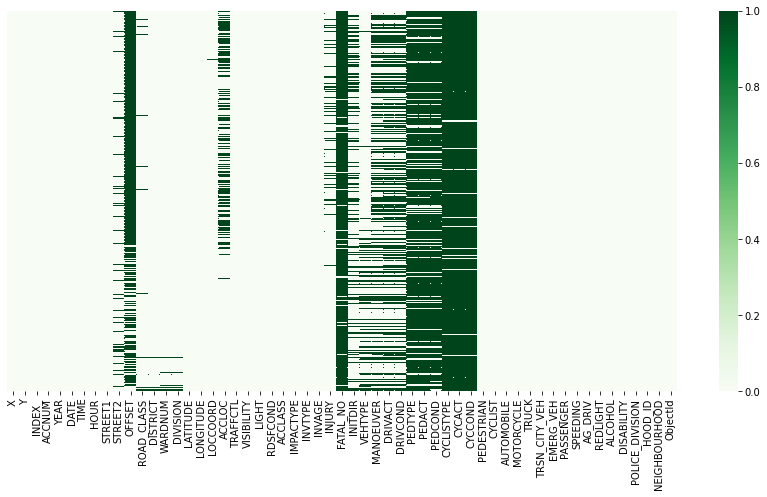

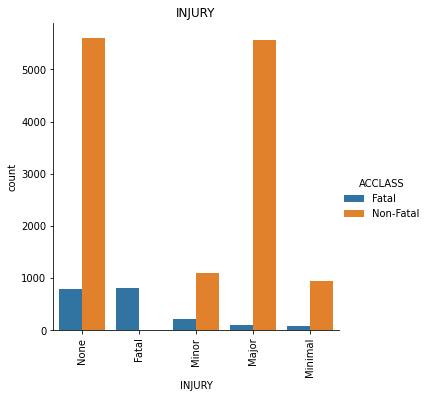

In [3]:

data = pd.read_csv('KSI.csv')
print("Initial shape:", data.shape)

# There are several columns consist of "Yes" and "<Null>" (where Null means No). 
# For these binary column, replace  "<Null>" with"No"
binary_cols = ['CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK','TRSN_CITY_VEH','EMERG_VEH','SPEEDING','REDLIGHT','ALCOHOL','DISABILITY','PASSENGER','AG_DRIV','PEDESTRIAN']
data[binary_cols]=data[binary_cols].replace({'<Null>':'No', 'Yes':'Yes'})

# Replace other '<Null>' with nan, printing percentage of missing values for each feature
data.replace('<Null>', np.nan, inplace=True)
data.replace(' ',np.nan,inplace=True)
print(data.isna().sum()/len(data)*100)

#The following heatmap shows the features having maximum missing values
fig, ax = plt.subplots(figsize=(15,7))
#heatmap to visualize features with most missing values
sns.heatmap(data.isnull(), yticklabels=False,cmap='Greens')
#shape
print(data.shape)

# Dropping columns where missing values were greater than 80%
drop_column = ['OFFSET','FATAL_NO','PEDTYPE','PEDACT','PEDCOND','CYCLISTYPE','CYCACT','CYCCOND']
data.drop(drop_column, axis=1, inplace=True)
#Drop irrelevant columns which are unique identifier
data.drop(['ObjectId','INDEX_'], axis=1, inplace=True)

print(data.shape)
print(data.isna().sum()/len(data)*100)

print(data.info())


#Changing the property damage and non-fatal columns to Non-Fatal¶
data['ACCLASS'] = np.where(data['ACCLASS'] == 'Property Damage Only', 'Non-Fatal', data['ACCLASS'])
data['ACCLASS'] = np.where(data['ACCLASS'] == 'Non-Fatal Injury', 'Non-Fatal', data['ACCLASS'])

data['ACCLASS'].unique()

## Verifying columns with object data type
print(data.select_dtypes(["object"]).columns)


# Neighbourhood is identical with Hood ID
#data.rename(columns={'Hood ID': 'Neighbourhood'}, inplace=True) # Neighbourhood is identical with Hood ID

# extract features: weekday,day, month 
data['DATE'] = pd.to_datetime(data['DATE'])
data['WEEKDAY'] =data['DATE'].dt.dayofweek
data['DAY'] = pd.to_datetime(data['DATE']).dt.day
data['MONTH'] = data['DATE'].dt.month

#Drop Date
data.drop(['DATE'], axis=1, inplace=True)

# Neighbourhood is identical with Hood ID, drop Neighbourhood
# X,Y are longitude and latitudes, dulicate, drop X and Y
data.drop(['NEIGHBOURHOOD','X','Y'], axis=1, inplace=True)

data['STREET1'].value_counts()
data['POLICE_DIVISION'].value_counts() 
# remove other irrelevant columns or columns contain too many missing values
data.drop(['MANOEUVER','DRIVACT','DRIVCOND','INITDIR','STREET1','STREET2','WARDNUM','POLICE_DIVISION','DIVISION'], axis=1, inplace=True)

#Injury
ax=sns.catplot(x='INJURY', kind='count', data=data,  hue='ACCLASS')
ax.set_xticklabels(rotation=90)
plt.title("INJURY")

data['INJURY'].value_counts()

# Injury too closely related to fatal/non-fatal, drop
data.drop(['INJURY'], axis=1, inplace=True)

#Visualization

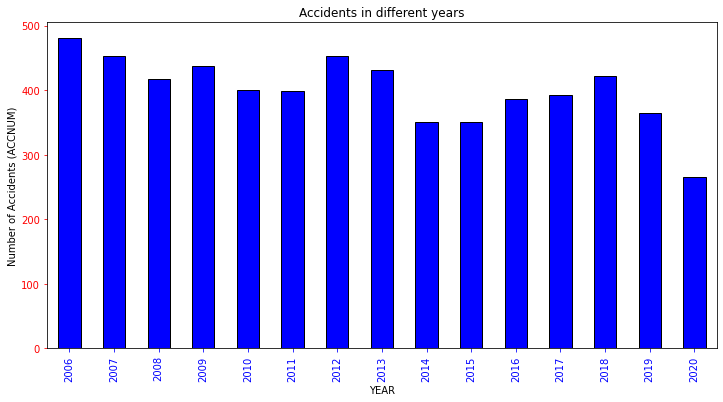

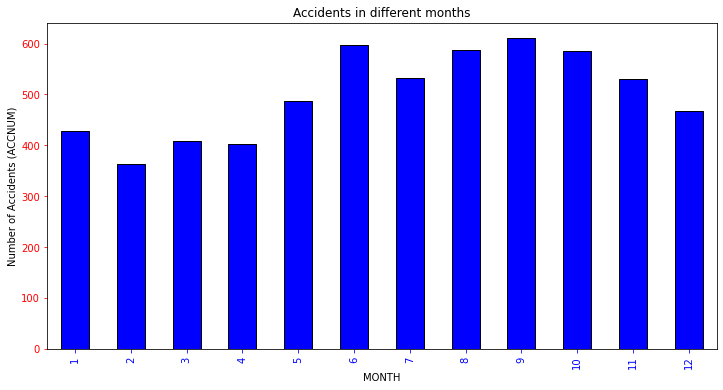

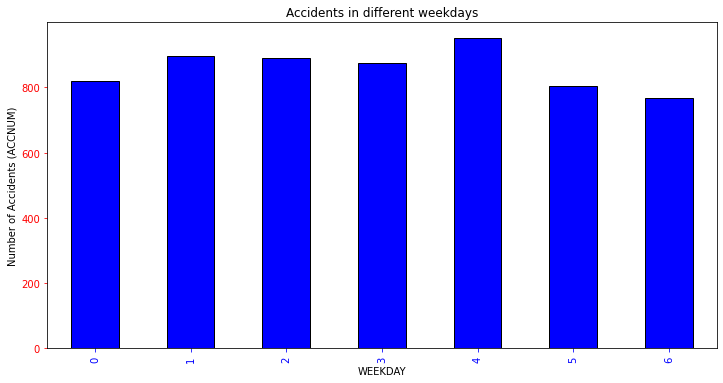

Text(0.5, 1.0, 'Light condition')

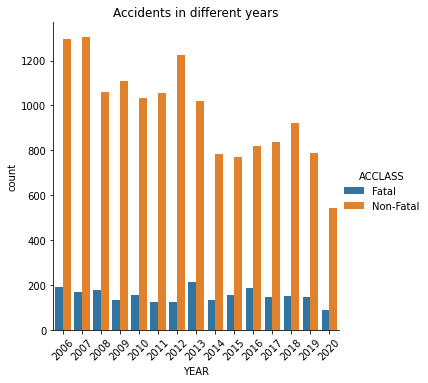

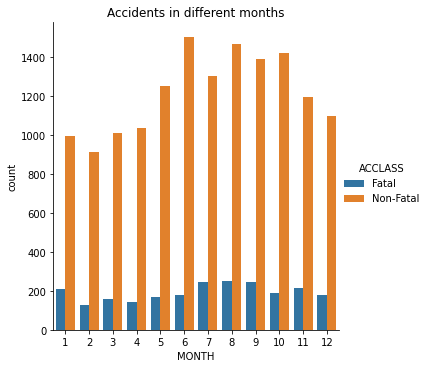

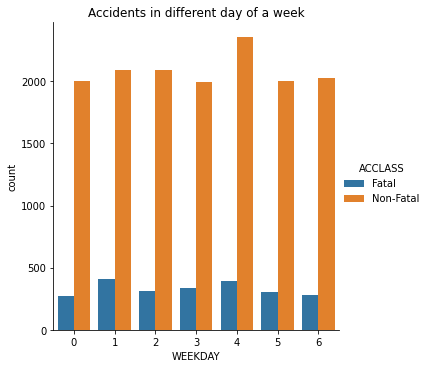

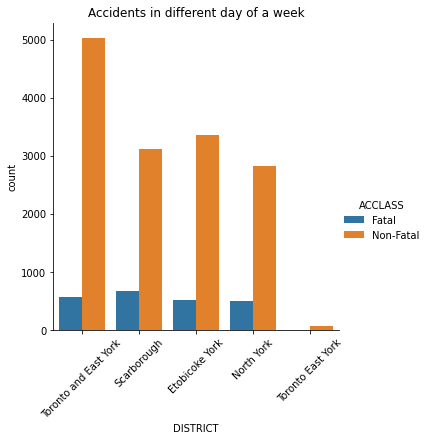

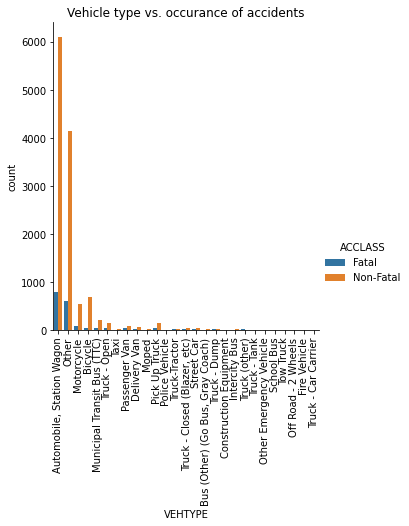

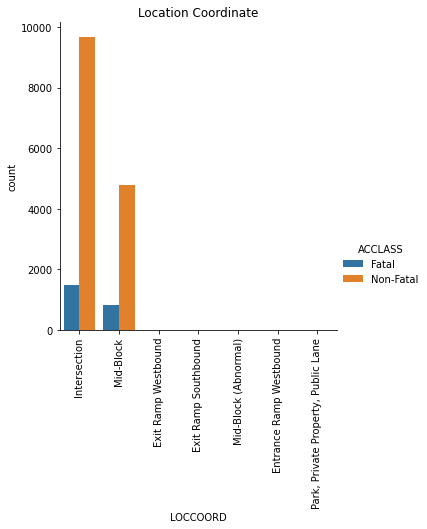

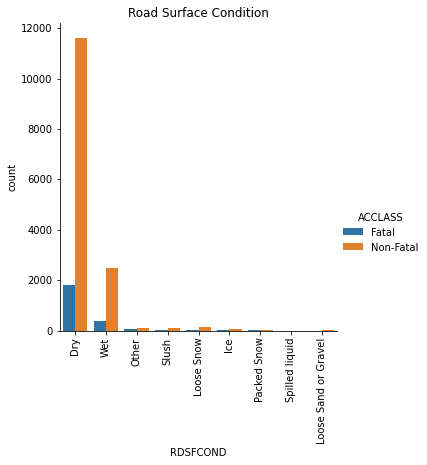

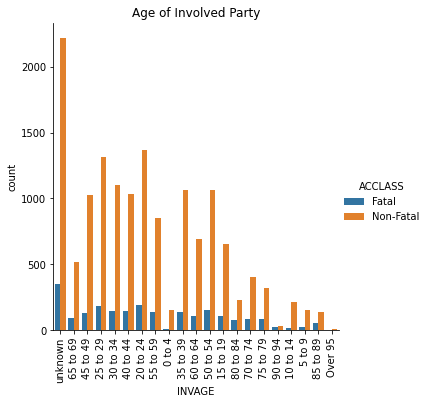

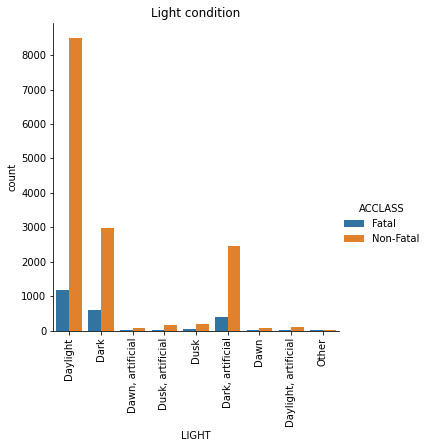

In [ ]:

#Number of Unique accidents by Year
Num_accident = data.groupby('YEAR')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents in different years")
plt.ylabel('Number of Accidents (ACCNUM)')
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
#Num_accident.plot(kind='bar',color= my_colors)
plt.show()

#Number of Unique accidents by Month
Num_accident = data.groupby('MONTH')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents in different months")
plt.ylabel('Number of Accidents (ACCNUM)')

ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
#Num_accident.plot(kind='bar',color= my_colors)
plt.show()

#From the data above, accidents happened more from June to October

#Number of Unique accidents by Day
Num_accident = data.groupby('WEEKDAY')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents in different weekdays")
plt.ylabel('Number of Accidents (ACCNUM)')
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
#Num_accident.plot(kind='bar',color= my_colors)
plt.show()

#Check the relation between features and target
#Year
ax=sns.catplot(x='YEAR', kind='count', data=data,  hue='ACCLASS')
ax.set_xticklabels(rotation=45)
plt.title("Accidents in different years")


#Month
ax=sns.catplot(x='MONTH', kind='count', data=data,  hue='ACCLASS')
plt.title("Accidents in different months")


#Month
ax=sns.catplot(x='WEEKDAY', kind='count', data=data,  hue='ACCLASS')
plt.title("Accidents in different day of a week")

#Neighborhood
ax=sns.catplot(x='DISTRICT', kind='count', data=data,  hue='ACCLASS')
ax.set_xticklabels(rotation=45)
plt.title("Accidents in different day of a week")

#Vehicle type
ax=sns.catplot(x='VEHTYPE', kind='count', data=data,  hue='ACCLASS')
ax.set_xticklabels(rotation=90)
plt.title("Vehicle type vs. occurance of accidents")

#LOCCOORD
ax=sns.catplot(x='LOCCOORD', kind='count', data=data,  hue='ACCLASS')
ax.set_xticklabels(rotation=90)
plt.title("Location Coordinate")


#RDSFCOND
ax=sns.catplot(x='RDSFCOND', kind='count', data=data,  hue='ACCLASS')
ax.set_xticklabels(rotation=90)
plt.title("Road Surface Condition")


#INVAGE
ax=sns.catplot(x='INVAGE', kind='count', data=data,  hue='ACCLASS')
ax.set_xticklabels(rotation=90)
plt.title("Age of Involved Party")


#Light
ax=sns.catplot(x='LIGHT', kind='count', data=data,  hue='ACCLASS')
ax.set_xticklabels(rotation=90)
plt.title("Light condition")


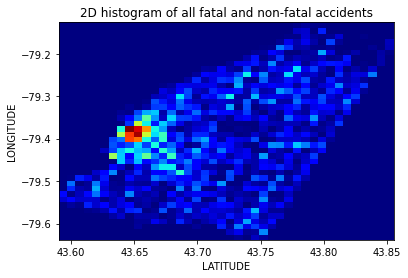

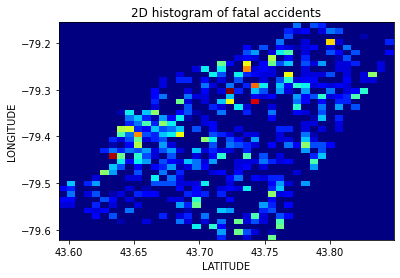

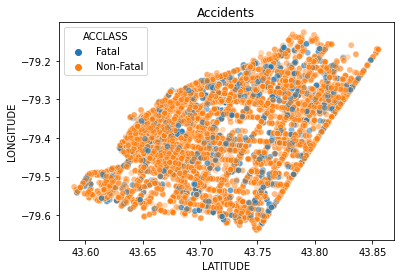

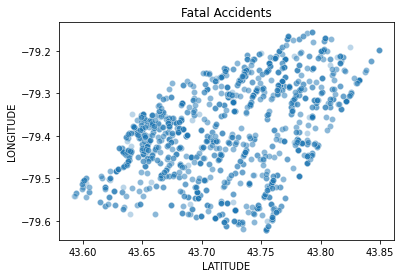

In [ ]:

# Where does accident more likly to occur
#2D histogram
plt.hist2d(data['LATITUDE'], data['LONGITUDE'], bins=(40, 40), cmap=plt.cm.jet)
plt.title("2D histogram of all fatal and non-fatal accidents")
plt.xlabel("LATITUDE")
plt.ylabel("LONGITUDE")
plt.show()

data_Fatal = data[data['ACCLASS'] == 'Fatal']
plt.hist2d(data_Fatal['LATITUDE'], data_Fatal['LONGITUDE'], bins=(40, 40), cmap=plt.cm.jet)
plt.title("2D histogram of fatal accidents")
plt.xlabel("LATITUDE")
plt.ylabel("LONGITUDE")
plt.show()


# scatter plot of all fatal and non-fatal accidents
sns.scatterplot(x='LATITUDE', y='LONGITUDE', data = data, hue = "ACCLASS",alpha=0.3)
plt.title("Accidents")
plt.show()
#scatter plot of fatal accidents
sns.scatterplot(x='LATITUDE', y='LONGITUDE', data = data[data['ACCLASS'] == 'Fatal'],alpha=0.3)
plt.title("Fatal Accidents")
plt.show()


#Data Preprocessing

In [4]:


print(data.isna().sum()/len(data)*100)

#several columns <3% missing values, 
#catagorical feature, not make much sense if impute, so keep the features, just discard these rows with missing values
data.dropna(subset=['ROAD_CLASS', 'DISTRICT','VISIBILITY','RDSFCOND','LOCCOORD','IMPACTYPE','TRAFFCTL','INVTYPE'],inplace=True)

#target class
data['ACCLASS']=data['ACCLASS'].replace({'Non-Fatal':0, 'Fatal':1})
data['ACCLASS'].value_counts()   #dataset is unbalanced

#Resampling- Upsampled

from sklearn.utils import resample
df=data
df_majority = df[df.ACCLASS==0]
df_minority = df[df.ACCLASS==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=14029,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print(df_upsampled.ACCLASS.value_counts())

data=df_upsampled

#Test Train split
#Since the dataset is unbalanced, use straified split
X = data.drop(["ACCLASS"], axis=1)
y= data["ACCLASS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5,stratify=y)

#impute
from sklearn.impute import SimpleImputer    
imputer = SimpleImputer(strategy="constant",fill_value='missing')  
data_tr=imputer.fit_transform(X_train)
data_tr= pd.DataFrame(data_tr, columns=X_train.columns)

print(data_tr.isna().sum()/len(data_tr)*100)

#numerical features
df1=data.drop(['ACCLASS'],axis=1)
num_columns=df1.select_dtypes(include=[np.number]).columns
print(num_columns)
data_num =data_tr[num_columns] 
#standardize 
scaler = StandardScaler() #define the instance
scaled =scaler.fit_transform(data_num)
data_num_scaled= pd.DataFrame(scaled, columns=num_columns)

#categorical features
cat_columns=df1.select_dtypes(exclude=[np.number]).columns
print(cat_columns)
categoricalData =data_tr[cat_columns]

data_cat = pd.get_dummies(categoricalData, columns=cat_columns, drop_first=True)
data_cat

X_train_prepared=pd.concat([data_num_scaled, data_cat], axis=1)
X_train_prepared


ACCNUM            0.000000
YEAR              0.000000
TIME              0.000000
HOUR              0.000000
ROAD_CLASS        2.947805
DISTRICT          0.836299
LATITUDE          0.000000
LONGITUDE         0.000000
LOCCOORD          0.622776
ACCLOC           32.325030
TRAFFCTL          0.172005
VISIBILITY        0.106762
LIGHT             0.000000
RDSFCOND          0.136418
ACCLASS           0.000000
IMPACTYPE         0.023725
INVTYPE           0.071174
INVAGE            0.000000
VEHTYPE          16.684460
PEDESTRIAN        0.000000
CYCLIST           0.000000
AUTOMOBILE        0.000000
MOTORCYCLE        0.000000
TRUCK             0.000000
TRSN_CITY_VEH     0.000000
EMERG_VEH         0.000000
PASSENGER         0.000000
SPEEDING          0.000000
AG_DRIV           0.000000
REDLIGHT          0.000000
ALCOHOL           0.000000
DISABILITY        0.000000
HOOD_ID           0.000000
WEEKDAY           0.000000
DAY               0.000000
MONTH             0.000000
dtype: float64
0    14029
1 

,ACCNUM,YEAR,TIME,HOUR,LATITUDE,LONGITUDE,HOOD_ID,WEEKDAY,DAY,MONTH,...,MOTORCYCLE_Yes,TRUCK_Yes,TRSN_CITY_VEH_Yes,EMERG_VEH_Yes,PASSENGER_Yes,SPEEDING_Yes,AG_DRIV_Yes,REDLIGHT_Yes,ALCOHOL_Yes,DISABILITY_Yes
0,2.011972,1.550065,-1.297355,-1.268241,-0.983696,0.172523,-0.062131,1.022980,-0.180902,0.671471,...,0,1,0,0,0,0,0,0,0,0
1,1.709465,1.314041,0.598622,0.623784,0.109994,-0.230384,-0.857699,0.000729,-1.658905,1.274116,...,0,0,1,0,1,0,0,0,0,0
2,-0.711489,-0.810174,-0.028108,-0.006891,-0.606199,-1.390896,-1.606469,-0.510397,-0.180902,-1.739107,...,0,0,0,0,0,0,1,0,0,0
3,-0.711461,-0.574150,-0.006007,-0.006891,-0.460426,-1.022069,0.920630,1.022980,0.956023,0.068826,...,0,0,0,0,0,0,0,0,0,0
4,-0.711412,-0.102102,-0.626422,-0.637566,-0.419034,-0.877705,0.850433,-1.021522,0.273868,1.575438,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22441,-0.711443,-0.338126,0.942770,0.939122,0.565380,-1.401142,-1.255483,1.022980,-1.545213,-0.835140,...,0,0,0,0,1,0,0,0,0,0
22442,1.709276,1.314041,-0.149665,-0.164560,1.510347,1.441634,1.318414,-1.532648,1.638178,0.068826,...,1,0,0,0,0,0,1,0,0,0
22443,2.011790,1.550065,0.909618,0.939122,0.808947,1.633201,1.435410,1.022980,0.728638,-0.232496,...,0,0,0,0,1,0,1,1,0,0
22444,0.801528,0.605969,-2.037748,-2.056585,0.735754,1.451935,1.435410,1.534105,0.046483,0.370149,...,0,0,0,0,1,0,1,1,1,0


#Feature Selection

Index(['ACCNUM', 'YEAR', 'TIME', 'HOUR', 'LATITUDE', 'LONGITUDE', 'HOOD_ID',
       'WEEKDAY', 'DAY', 'MONTH', 'ROAD_CLASS_Major Arterial',
       'DISTRICT_Toronto and East York', 'LOCCOORD_Intersection',
       'LOCCOORD_Mid-Block', 'ACCLOC_missing', 'TRAFFCTL_Traffic Signal',
       'LIGHT_Daylight', 'RDSFCOND_Wet', 'IMPACTYPE_Pedestrian Collisions',
       'IMPACTYPE_Rear End', 'IMPACTYPE_Turning Movement',
       'INVTYPE_Pedestrian', 'INJURY_Major', 'INJURY_None', 'VEHTYPE_missing',
       'PEDESTRIAN_Yes', 'AUTOMOBILE_Yes', 'TRUCK_Yes', 'PASSENGER_Yes',
       'SPEEDING_Yes', 'AG_DRIV_Yes'],
      dtype='object')


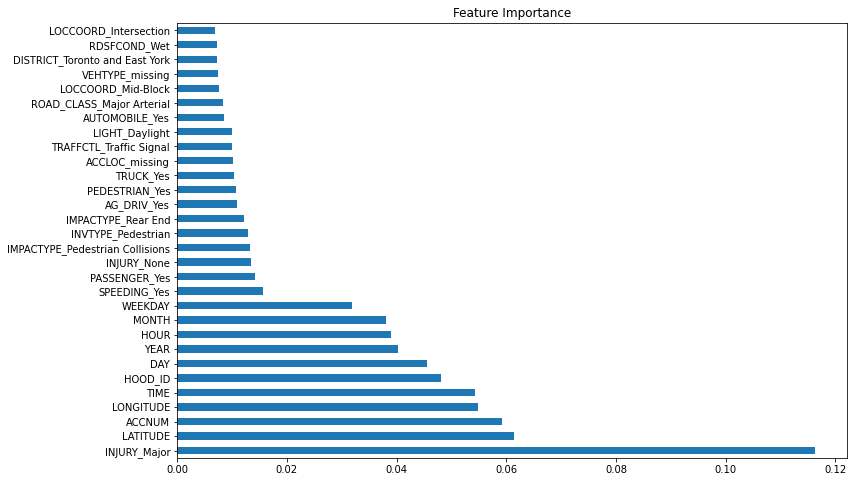

In [ ]:
#method 1: using SelectFromModel and RandomForestClassifier to select features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_prepared, y_train)
selected_feat= X_train_prepared.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

feat_importances = pd.Series(sel.estimator_.feature_importances_, index=X_train_prepared.columns)
#plot the selected features
fig = plt.gcf()
fig.set_size_inches(12, 8)
feat_importances.nlargest(30).plot(kind='barh')
plt.title("Feature Importance")
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Index(['ACCNUM', 'YEAR', 'TIME', 'HOUR', 'LATITUDE', 'LONGITUDE', 'HOOD_ID',
       'WEEKDAY', 'DAY', 'MONTH',
       ...
       'MOTORCYCLE_Yes', 'TRUCK_Yes', 'TRSN_CITY_VEH_Yes', 'EMERG_VEH_Yes',
       'PASSENGER_Yes', 'SPEEDING_Yes', 'AG_DRIV_Yes', 'REDLIGHT_Yes',
       'ALCOHOL_Yes', 'DISABILITY_Yes'],
      dtype='object', length=125)


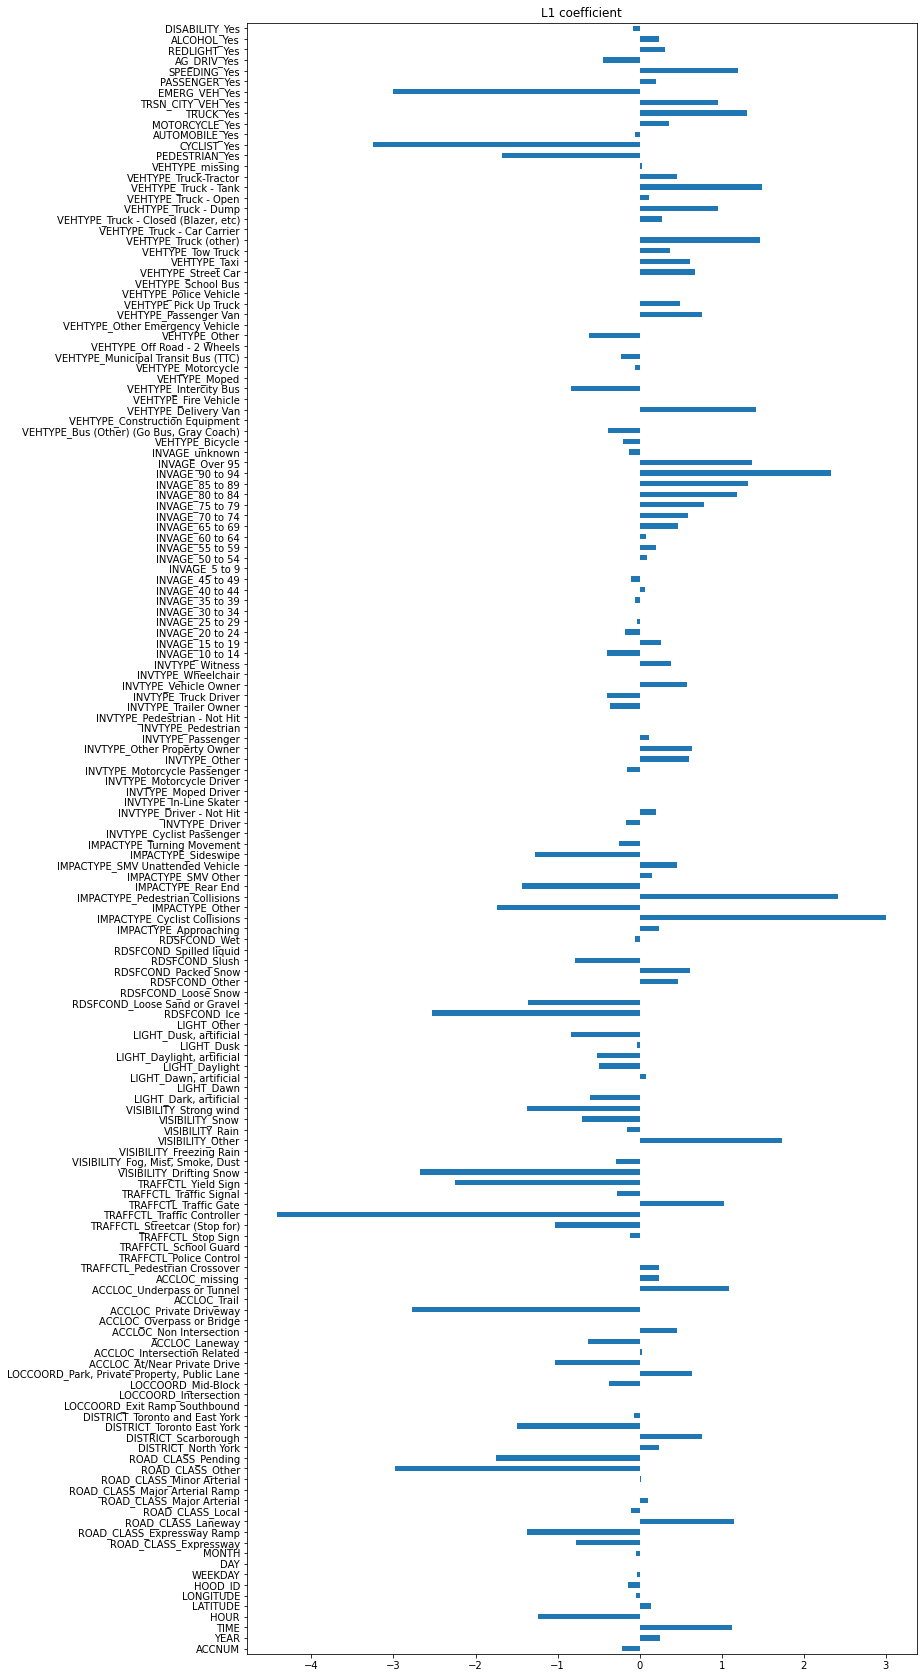

ROAD_CLASS_Major Arterial Ramp     0.0
LOCCOORD_Exit Ramp Southbound      0.0
LOCCOORD_Intersection              0.0
ACCLOC_Overpass or Bridge          0.0
ACCLOC_Trail                       0.0
TRAFFCTL_Police Control            0.0
TRAFFCTL_School Guard              0.0
VISIBILITY_Freezing Rain           0.0
LIGHT_Dawn                         0.0
LIGHT_Other                        0.0
RDSFCOND_Loose Snow                0.0
RDSFCOND_Spilled liquid            0.0
INVTYPE_Cyclist Passenger          0.0
INVTYPE_In-Line Skater             0.0
INVTYPE_Moped Driver               0.0
INVTYPE_Motorcycle Driver          0.0
INVTYPE_Pedestrian                 0.0
INVTYPE_Pedestrian - Not Hit       0.0
INVTYPE_Wheelchair                 0.0
INVAGE_30 to 34                    0.0
INVAGE_5 to 9                      0.0
VEHTYPE_Construction Equipment     0.0
VEHTYPE_Fire Vehicle               0.0
VEHTYPE_Moped                      0.0
VEHTYPE_Off Road - 2 Wheels        0.0
VEHTYPE_Other Emergency V

In [ ]:
#method 2: Logistic regression
from sklearn.linear_model import LogisticRegression
sel = SelectFromModel(LogisticRegression(solver='saga',penalty='l1'))
sel.fit(X_train_prepared, y_train)
selected_feat= X_train_prepared.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

coefficient= pd.Series(sel.estimator_.coef_[0], index=X_train_prepared.columns)
#plot the selected features
fig = plt.gcf()
fig.set_size_inches(12, 30)
coefficient.plot(kind='barh')
plt.title("L1 coefficient")
plt.show()

abs_coefficient =abs(coefficient)
print(coefficient[coefficient==0])

In [5]:

#selected features

#numerical features
num_columns=['ACCNUM', 'YEAR', 'TIME', 'HOUR', 'LATITUDE', 'LONGITUDE', 'WEEKDAY', 'DAY', 'MONTH']
data_num =data_tr[num_columns] 
num_columns=data_num.columns
print(num_columns)

#categorical features

cat_columns=['CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK','TRSN_CITY_VEH','EMERG_VEH','SPEEDING','REDLIGHT','ALCOHOL','DISABILITY','PASSENGER','AG_DRIV','PEDESTRIAN',
              'ROAD_CLASS', 'DISTRICT',  'TRAFFCTL','VISIBILITY', 'LIGHT', 'RDSFCOND','IMPACTYPE', 'INVAGE']
categoricalData =data_tr[cat_columns]
#categoricalData= data_tr.select_dtypes(exclude=[np.number])
print(categoricalData.columns)
data_cat = pd.get_dummies(categoricalData, columns=cat_columns, drop_first=True)
data_cat

df=pd.concat([data_num, data_cat], axis=1)
df

Index(['ACCNUM', 'YEAR', 'TIME', 'HOUR', 'LATITUDE', 'LONGITUDE', 'WEEKDAY',
       'DAY', 'MONTH'],
      dtype='object')
Index(['CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'PASSENGER', 'AG_DRIV', 'PEDESTRIAN', 'ROAD_CLASS', 'DISTRICT',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVAGE'],
      dtype='object')


,ACCNUM,YEAR,TIME,HOUR,LATITUDE,LONGITUDE,WEEKDAY,DAY,MONTH,CYCLIST_Yes,...,INVAGE_55 to 59,INVAGE_60 to 64,INVAGE_65 to 69,INVAGE_70 to 74,INVAGE_75 to 79,INVAGE_80 to 84,INVAGE_85 to 89,INVAGE_90 to 94,INVAGE_Over 95,INVAGE_unknown
0,9001763544,2019,511,5,43.662169,-79.37263,5,14,9,1,...,0,0,0,0,0,0,0,0,0,0
1,8002016979,2018,1712,17,43.722941,-79.415889,3,1,11,0,...,0,0,0,0,0,0,0,0,0,0
2,1088275,2009,1315,13,43.683145,-79.54049,2,14,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1178905,2010,1329,13,43.691245,-79.50089,5,24,7,0,...,0,0,0,0,0,0,0,0,0,0
4,1340236,2012,936,9,43.693545,-79.48539,1,18,12,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22441,1237144,2011,1930,19,43.748245,-79.54159,5,2,4,0,...,0,0,0,0,0,0,0,0,0,0
22442,8001393342,2018,1238,12,43.800753,-79.236369,0,30,7,0,...,0,0,0,0,0,0,0,0,0,0
22443,9001160017,2019,1909,19,43.761779,-79.215801,5,22,6,0,...,0,0,0,0,0,0,0,0,0,0
22444,5001405584,2015,42,0,43.757712,-79.235263,6,16,8,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
##################

# Pipelines

#################
# build a pipeline for preprocessing the categorical attributes
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="constant",fill_value='missing')),
        ('one_hot', OneHotEncoder(drop='first')),
    ])
# build a pipeline for preprocessing the numerical attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
#full transformation Column Transformer
num_attribs = num_columns
cat_attribs = cat_columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


In [7]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_train_prepared.shape

(22446, 96)

In [8]:
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared.shape

(5612, 96)

#Model Training,Tuning and Testing

##Logistic regression

In [22]:
""" Before Tuning """
#Logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='saga')
X_train_prepared = full_pipeline.fit_transform(X_train)
X_train_prepared.toarray()
#test
X_test_prepared = full_pipeline.transform(X_test)
X_train_prepared.shape
lr.fit(X_train_prepared,y_train)
#predict
y_test_pred=lr.predict(X_test_prepared)
print("Training Accuracy",lr.score(X_train_prepared, y_train))
print("Before Tuning:")

print("accuracy", accuracy_score(y_test, y_test_pred))
print("precison",precision_score(y_test, y_test_pred))
print("recall",recall_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Training Accuracy 0.6888086964269803
Before Tuning:
accuracy 0.6847826086956522
precison 0.6799722318639362
recall 0.6981468282252317
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      2806
           1       0.68      0.70      0.69      2806

    accuracy                           0.68      5612
   macro avg       0.68      0.68      0.68      5612
weighted avg       0.68      0.68      0.68      5612



In [25]:
"""After Tuning"""

from sklearn.model_selection import GridSearchCV
#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],'solver':['saga','liblinear']}
grid = {'penalty': ['l1', 'l2'], 
               'C':[0.01,0.1, 1],
               'solver':['saga'],
               'max_iter':[1000]
               }
grid_search = GridSearchCV(lr, param_grid =grid,scoring = 'accuracy',cv=3,return_train_score=True, verbose = 3)
grid_search.fit(X_train_prepared, y_train)

#Best parameters
print('Best parameters',grid_search.best_params_)
print('Best estimator',grid_search.best_estimator_)
cvres = grid_search.cv_results_
best_logistic_model = grid_search.best_estimator_
best_logistic_model.predict(X_test_prepared)


from sklearn.metrics import accuracy_score
print("After Tuning:")
print("Accuracy", accuracy_score(y_test, y_test_pred))
print("Precision", precision_score(y_test, y_test_pred))
print("Recall", recall_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END C=0.01, max_iter=1000, penalty=l1, solver=saga;, score=(train=0.632, test=0.640) total time=   1.4s
[CV 2/3] END C=0.01, max_iter=1000, penalty=l1, solver=saga;, score=(train=0.641, test=0.639) total time=   1.0s
[CV 3/3] END C=0.01, max_iter=1000, penalty=l1, solver=saga;, score=(train=0.641, test=0.631) total time=   1.3s
[CV 1/3] END C=0.01, max_iter=1000, penalty=l2, solver=saga;, score=(train=0.665, test=0.668) total time=   0.2s
[CV 2/3] END C=0.01, max_iter=1000, penalty=l2, solver=saga;, score=(train=0.670, test=0.667) total time=   0.1s
[CV 3/3] END C=0.01, max_iter=1000, penalty=l2, solver=saga;, score=(train=0.672, test=0.663) total time=   0.1s
[CV 1/3] END C=0.1, max_iter=1000, penalty=l1, solver=saga;, score=(train=0.674, test=0.680) total time=   0.2s
[CV 2/3] END C=0.1, max_iter=1000, penalty=l1, solver=saga;, score=(train=0.683, test=0.679) total time=   0.2s
[CV 3/3] END C=0.1, max_iter=1000, pen

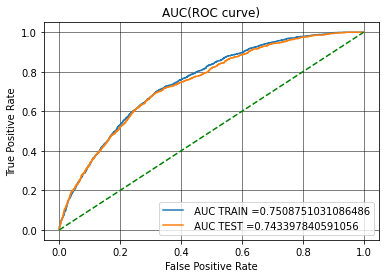

In [26]:
#define metrics
y_lg_train_pred_proba = best_logistic_model.predict_proba(X_train_prepared)[::,1]
y_lg_test_pred_proba = best_logistic_model.predict_proba(X_test_prepared)[::,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_lg_train_pred_proba)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_lg_test_pred_proba)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

##SVM

In [27]:
"""
Before Tuning
"""

#SVM
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train_prepared, y_train)
#accuracy on training dataset
print(clf.score(X_train_prepared,y_train))


#test
#predict
y_test_pred=clf.predict(X_test_prepared)

print("Before Tuning:")
print("accuracy", accuracy_score(y_test, y_test_pred))
print("precison",precision_score(y_test, y_test_pred))
print("recall",recall_score(y_test, y_test_pred))
print("f1 score", f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


0.925242804954112
Before Tuning:
accuracy 0.9018175338560228
precison 0.8742117490872884
recall 0.9387027797576621
f1 score 0.9053101907544251
              precision    recall  f1-score   support

           0       0.93      0.86      0.90      2806
           1       0.87      0.94      0.91      2806

    accuracy                           0.90      5612
   macro avg       0.90      0.90      0.90      5612
weighted avg       0.90      0.90      0.90      5612



In [9]:

""" Tuning: Random Search"""
#SVM
from sklearn.svm import SVC
clf_svm=SVC()

#Random search
param_svm = [
    {'kernel': ['poly','rbf'], 
     'C': [0.01,0.1, 1],
     'gamma': [0.01, 0.05, 0.1],
     'degree':[2,3]}

  ]

random_search_svm = RandomizedSearchCV(estimator=clf_svm, param_distributions=param_svm, cv=3, scoring='accuracy', refit = True, verbose = 3)
random_search_svm.fit(X_train_prepared, y_train)
#Best parameters
print(random_search_svm.best_params_)
print(random_search_svm.best_estimator_)

random_search_svm.cv_results_

best_model= random_search_svm.best_estimator_

#predict using the best model
y_test_pred = best_model.predict(X_test_prepared)

from sklearn.metrics import accuracy_score
print("After Tuning:")
print("Accuracy", accuracy_score(y_test, y_test_pred))
print("Precision", precision_score(y_test, y_test_pred))
print("Recall", recall_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.722 total time=  31.0s
[CV 2/3] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.726 total time=  31.8s
[CV 3/3] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.728 total time=  32.7s
[CV 1/3] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.619 total time=  34.8s
[CV 2/3] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.620 total time=  36.4s
[CV 3/3] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.617 total time=  35.5s
[CV 1/3] END C=0.1, degree=3, gamma=0.05, kernel=rbf;, score=0.719 total time=  35.6s
[CV 2/3] END C=0.1, degree=3, gamma=0.05, kernel=rbf;, score=0.712 total time=  35.1s
[CV 3/3] END C=0.1, degree=3, gamma=0.05, kernel=rbf;, score=0.704 total time=  36.0s
[CV 1/3] END C=0.01, degree=2, gamma=0.05, kernel=poly;, score=0.622 total time=  34.8s
[CV 2/3] END C=0.01, degree=2, gamma=0.05, kernel=poly;, score=0.625 to

In [ ]:
#Fine Tuning
#SVM
from sklearn.svm import SVC
clf_svm=SVC()

#Grid search
param_grid_svm = [
    {'kernel': ['poly','rbf'], 
     'C': [0.01,0.1, 1],
     'gamma': [0.01, 0.05, 0.1],
     'degree':[2,3]}

  ]

grid_search_svm = GridSearchCV(estimator=clf_svm, param_grid=param_grid_svm, cv=3, scoring='accuracy', refit = True, verbose = 3)
grid_search_svm.fit(X_train_prepared, y_train)
#Best parameters
print(grid_search_svm.best_params_)
print(grid_search_svm.best_estimator_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.619 total time=  40.0s
[CV 2/3] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.620 total time=  37.5s
[CV 3/3] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.617 total time=  37.5s
[CV 1/3] END C=0.01, degree=2, gamma=0.01, kernel=rbf;, score=0.585 total time=  42.1s
[CV 2/3] END C=0.01, degree=2, gamma=0.01, kernel=rbf;, score=0.592 total time=  43.1s
[CV 3/3] END C=0.01, degree=2, gamma=0.01, kernel=rbf;, score=0.586 total time=  41.4s
[CV 1/3] END C=0.01, degree=2, gamma=0.05, kernel=poly;, score=0.622 total time=  36.8s
[CV 2/3] END C=0.01, degree=2, gamma=0.05, kernel=poly;, score=0.625 total time=  36.8s
[CV 3/3] END C=0.01, degree=2, gamma=0.05, kernel=poly;, score=0.630 total time=  36.4s
[CV 1/3] END C=0.01, degree=2, gamma=0.05, kernel=rbf;, score=0.620 total time=  41.9s
[CV 2/3] END C=0.01, degree=2, gamma=0.05, kernel=rbf;, score=

In [ ]:
best_model= grid_search_svm.best_estimator_
#predict using the best model
y_test_pred = best_model.predict(X_test_prepared)

from sklearn.metrics import accuracy_score
print("After Tuning:")
print("Accuracy", accuracy_score(y_test, y_test_pred))
print("Precision", precision_score(y_test, y_test_pred))
print("Recall", recall_score(y_test, y_test_pred))
print("f1 score", f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

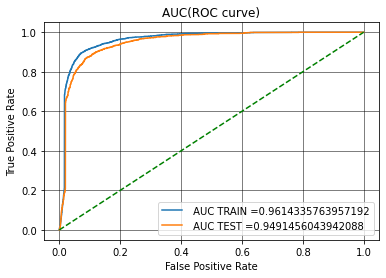

In [10]:
#ROC curve

y_train_pred = best_model.decision_function(X_train_prepared)    
y_test_pred = best_model.decision_function(X_test_prepared) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()